In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dengue_features_train.csv')
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
df.shape

(1456, 24)

In [4]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [5]:
missing_percentage = (df.isna().sum()/ df.shape[0]).sort_values(ascending=False).reset_index()
missing_percentage.columns = ('feature', 'missing_percentage')
missing_percentage.head()

,feature,missing_percentage
0,ndvi_ne,0.133242
1,ndvi_nw,0.035714
2,station_diur_temp_rng_c,0.029533
3,station_avg_temp_c,0.029533
4,station_precip_mm,0.015110


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

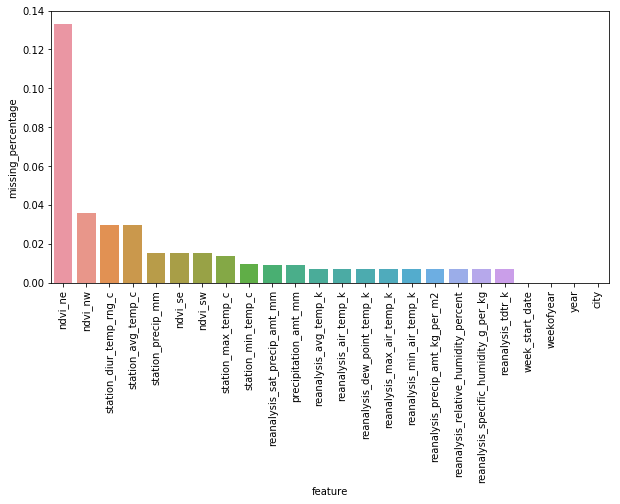

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(data=missing_percentage, x='feature', y='missing_percentage')
plt.xticks(rotation=90)

In [7]:
df.corr()['ndvi_ne'].abs().sort_values(ascending=False)

ndvi_ne                                  1.000000
ndvi_nw                                  0.850902
reanalysis_tdtr_k                        0.673935
ndvi_sw                                  0.669504
station_diur_temp_rng_c                  0.658129
reanalysis_max_air_temp_k                0.634330
reanalysis_min_air_temp_k                0.623116
ndvi_se                                  0.614380
station_max_temp_c                       0.491922
reanalysis_relative_humidity_percent     0.457985
reanalysis_air_temp_k                    0.340976
station_min_temp_c                       0.315696
station_precip_mm                        0.242263
year                                     0.223361
precipitation_amt_mm                     0.205736
reanalysis_sat_precip_amt_mm             0.205736
reanalysis_precip_amt_kg_per_m2          0.199411
station_avg_temp_c                       0.186227
reanalysis_specific_humidity_g_per_kg    0.094852
reanalysis_dew_point_temp_k              0.056077


# Visualizations 

# Extracting features 

In [8]:
ndvi_feature_names = list(filter(lambda s: s.startswith(r'ndvi'), list(df.columns)))
reanalysis_feature_names = list(filter(lambda s: s.startswith(r'reanalysis'), list(df.columns)))
station_feature_names = list(filter(lambda s: s.startswith('station'), list(df.columns)))

ndvi_feature_names, reanalysis_feature_names, station_feature_names

(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'],
 ['reanalysis_air_temp_k',
  'reanalysis_avg_temp_k',
  'reanalysis_dew_point_temp_k',
  'reanalysis_max_air_temp_k',
  'reanalysis_min_air_temp_k',
  'reanalysis_precip_amt_kg_per_m2',
  'reanalysis_relative_humidity_percent',
  'reanalysis_sat_precip_amt_mm',
  'reanalysis_specific_humidity_g_per_kg',
  'reanalysis_tdtr_k'],
 ['station_avg_temp_c',
  'station_diur_temp_rng_c',
  'station_max_temp_c',
  'station_min_temp_c',
  'station_precip_mm'])

In [9]:
numerical_features = ndvi_feature_names + reanalysis_feature_names + station_feature_names
numerical_features

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [10]:
historical_data = df[numerical_features].rolling(10).mean().fillna(method="bfill")

In [11]:
historical_data.columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [12]:
column_rename = lambda name: 'past_' + name
historical_data.columns = map(column_rename, historical_data.columns)

In [13]:
historical_data.shape

(1456, 19)

In [14]:
historical_data.head()

,past_ndvi_ne,past_ndvi_nw,past_ndvi_se,past_ndvi_sw,past_reanalysis_air_temp_k,past_reanalysis_avg_temp_k,past_reanalysis_dew_point_temp_k,past_reanalysis_max_air_temp_k,past_reanalysis_min_air_temp_k,past_reanalysis_precip_amt_kg_per_m2,past_reanalysis_relative_humidity_percent,past_reanalysis_sat_precip_amt_mm,past_reanalysis_specific_humidity_g_per_kg,past_reanalysis_tdtr_k,past_station_avg_temp_c,past_station_diur_temp_rng_c,past_station_max_temp_c,past_station_min_temp_c,past_station_precip_mm
0,0.20776,0.153401,0.189391,0.183838,299.123286,299.230714,295.421,301.32,297.47,26.314,80.290143,29.057,16.840286,2.235714,27.584286,7.12,32.99,22.94,18.79
1,0.20776,0.153401,0.189391,0.183838,299.123286,299.230714,295.421,301.32,297.47,26.314,80.290143,29.057,16.840286,2.235714,27.584286,7.12,32.99,22.94,18.79
2,0.20776,0.153401,0.189391,0.183838,299.123286,299.230714,295.421,301.32,297.47,26.314,80.290143,29.057,16.840286,2.235714,27.584286,7.12,32.99,22.94,18.79
3,0.20776,0.153401,0.189391,0.183838,299.123286,299.230714,295.421,301.32,297.47,26.314,80.290143,29.057,16.840286,2.235714,27.584286,7.12,32.99,22.94,18.79
4,0.20776,0.153401,0.189391,0.183838,299.123286,299.230714,295.421,301.32,297.47,26.314,80.290143,29.057,16.840286,2.235714,27.584286,7.12,32.99,22.94,18.79


In [15]:
X = pd.read_csv('dengue_features_train.csv')
Y = pd.read_csv('dengue_labels_train.csv')
X_new = pd.read_csv('dengue_features_test.csv')

In [16]:
shape_of_df = lambda x: x.shape
list(map(shape_of_df, [X, Y, X_new]))

[(1456, 24), (1456, 4), (416, 24)]

# Trasnform train vectors

In [17]:
def add_historical_values(df):
    historical_data = df[numerical_features].rolling(1).mean().fillna(method="bfill")
    column_rename = lambda name: 'past_' + name
    historical_data.columns = map(column_rename, historical_data.columns)
    return pd.concat([df, historical_data], axis=1)

In [18]:
def handle_missing_values(df):
    return df.fillna(df.mean())

In [19]:
def dummify_cities(df):
    city_features = pd.get_dummies(df['city'], prefix='city')
    df_without_cities = df.drop('city', axis=1)
    return pd.concat([df_without_cities, city_features], axis=1)

In [20]:
def remove_unwanted_features(df):
    features_not_used = ['week_start_date', 'total_cases', 'year']
    features_to_use = set(df.columns) - set(features_not_used)
    features_to_use = list(features_to_use)
    return df[features_to_use]

In [21]:
def do_all_transforms(df):
    df = handle_missing_values(df)
    df = add_historical_values(df)
    df = dummify_cities(df)
    df = remove_unwanted_features(df)
    return df

## Seperating test and train datasets

In [22]:
X = do_all_transforms(X)
y = Y['total_cases']

## Correlations

In [23]:
df_with_historical_data = pd.concat([X, y], axis=1)
df_with_historical_data.head(2)

,past_station_max_temp_c,reanalysis_tdtr_k,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_air_temp_k,weekofyear,ndvi_sw,reanalysis_relative_humidity_percent,city_sj,past_reanalysis_precip_amt_kg_per_m2,...,reanalysis_avg_temp_k,reanalysis_sat_precip_amt_mm,city_iq,past_reanalysis_air_temp_k,past_station_diur_temp_rng_c,ndvi_ne,station_max_temp_c,ndvi_nw,reanalysis_max_air_temp_k,total_cases
0,29.4,2.628571,12.42,32.00,297.572857,18,0.177617,73.365714,1,32.00,...,297.742857,12.42,0,297.572857,6.900000,0.1226,29.4,0.103725,299.8,4
1,31.7,2.371429,22.82,17.94,298.211429,19,0.155486,77.368571,1,17.94,...,298.442857,22.82,0,298.211429,6.371429,0.1699,31.7,0.142175,300.9,5


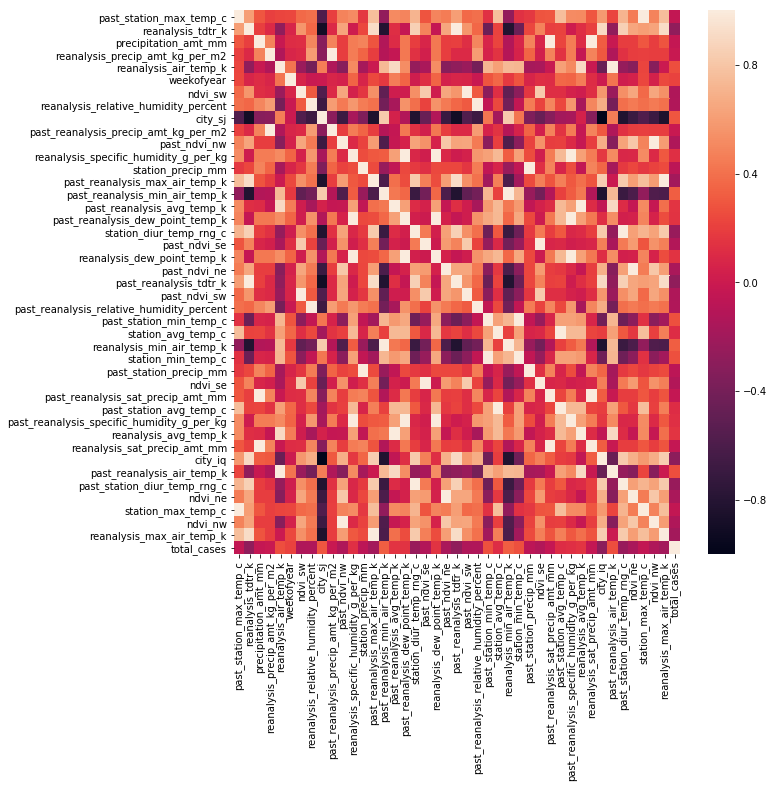

In [24]:
plt.figure(figsize=(10, 10))
corr = df_with_historical_data.corr()
sns.heatmap(corr)

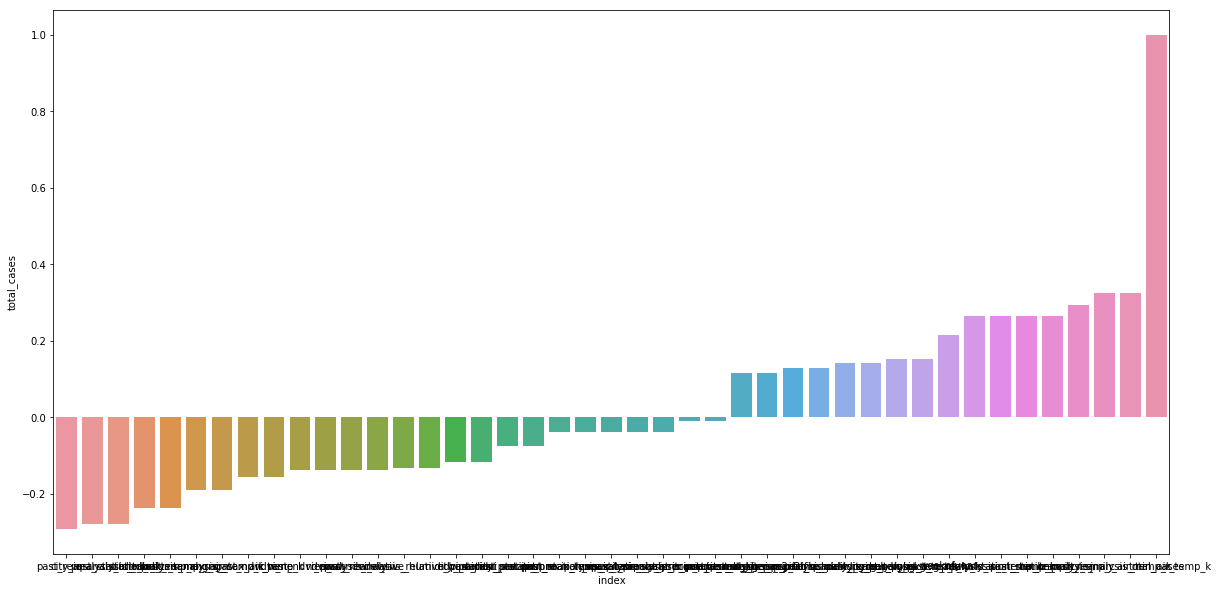

In [25]:
plt.figure(figsize=(20, 10))
corrs_with_total_cases = corr['total_cases'].sort_values().reset_index()

sns.barplot(data=corrs_with_total_cases, x='index', y='total_cases')
# corrs_with_total_cases

# Testing on models

In [26]:
from sklearn.model_selection import cross_val_score
def print_cross_val_scores(model, X, y):
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
    print('Scores: ' + str(scores))
    average = scores.sum() / len(scores)
    print('Average score: ' + str(average))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
list(map(lambda x: x.shape, [X_test, X_train, y_test, y_train]))

[(364, 42), (1092, 42), (364,), (1092,)]

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.23257356525816297

In [29]:
print_cross_val_scores(lr, X, y)

Scores: [-31.49289016 -45.10356093 -42.3905958 ]
Average score: -39.66234896368825


In [30]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.03860436069450579

In [31]:
print_cross_val_scores(dtree, X, y)

Scores: [-35.78395062 -60.92886598 -20.55463918]
Average score: -39.08915192397438


In [32]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.09932766220351708

In [33]:
print_cross_val_scores(svr, X, y)

Scores: [-40.5117061  -14.04215735 -13.35887858]
Average score: -22.63758067678639


In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.06043956043956044

In [35]:
print_cross_val_scores(nb, X, y)

/home/sivakar/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Scores: [-38.43169399 -22.26963907 -14.08486239]
Average score: -24.92873181340318


In [36]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.36466094446914954

In [37]:
print_cross_val_scores(forest, X, y)

Scores: [-33.29909465 -38.72405498 -19.72531271]
Average score: -30.582820782600084


In [38]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(5, 2), random_state=42)
nn.fit(X_train, y_train)
nn.score(X_test, y_test)

/home/sivakar/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-0.0028843928980821776

In [39]:
print_cross_val_scores(nn, X, y)

/home/sivakar/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/sivakar/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scores: [-42.33725275 -15.05914644  -6.16917272]
Average score: -21.188523971117736


/home/sivakar/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Doing a Grid Search on Random Forest

In [40]:
# from sklearn.model_selection import GridSearchCV
# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [4,5,6,7,8],
#     'criterion': ['mse', 'mae']
# }
# model = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
# model.fit(X, y)

# Running on unknown data

In [41]:
output = pd.DataFrame()

In [42]:
output = X_new[['city', 'year', 'weekofyear']]

In [43]:
X_new = do_all_transforms(X_new)
X_new.head()

,past_station_max_temp_c,reanalysis_tdtr_k,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_air_temp_k,weekofyear,ndvi_sw,reanalysis_relative_humidity_percent,city_sj,past_reanalysis_precip_amt_kg_per_m2,...,past_reanalysis_specific_humidity_g_per_kg,reanalysis_avg_temp_k,reanalysis_sat_precip_amt_mm,city_iq,past_reanalysis_air_temp_k,past_station_diur_temp_rng_c,ndvi_ne,station_max_temp_c,ndvi_nw,reanalysis_max_air_temp_k
0,33.3,3.128571,78.60,25.37,298.492857,18,0.091200,78.781429,1,25.37,...,15.918571,298.550000,78.60,0,298.492857,7.057143,-0.01890,33.3,-0.018900,301.1
1,30.0,2.571429,12.56,21.83,298.475714,19,0.072314,78.230000,1,21.83,...,15.791429,298.557143,12.56,0,298.475714,5.557143,-0.01800,30.0,-0.012400,300.8
2,32.8,4.428571,3.66,4.12,299.455714,20,0.091529,78.270000,1,4.12,...,16.674286,299.357143,3.66,0,299.455714,7.785714,-0.00150,32.8,0.126803,302.2
3,33.3,4.342857,0.00,2.20,299.690000,21,0.125686,73.015714,1,2.20,...,15.775714,299.728571,0.00,0,299.690000,6.271429,0.12605,33.3,-0.019867,303.0
4,33.3,3.542857,0.76,4.36,299.780000,22,0.075914,74.084286,1,4.36,...,16.137143,299.671429,0.76,0,299.780000,7.085714,0.05680,33.3,0.039833,302.3


In [44]:
model = svr

In [45]:
model.fit(X, y)
predictions = model.predict(X_new)

In [46]:
predictions = predictions.round()

In [47]:
output['total_cases'] = predictions

In [48]:
output['total_cases'] = pd.to_numeric(output['total_cases'], downcast='integer')

In [49]:
output.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,12
1,sj,2008,19,12
2,sj,2008,20,10
3,sj,2008,21,11
4,sj,2008,22,12


In [50]:
output.to_csv('submission1.csv', index=False)